# Variability analysis

Look at the 6-year sources, including pulsars, to study variability

First CD to the monthly directory and import needed modules

In [1]:
%matplotlib inline
from uw.like2.analyze import (transientinfo, )
map( reload, (transientinfo,))
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_monthly'))

In [2]:
%time ta = transientinfo.Analysis() 

good sources: 29881/42912
High latitude (>10 deg) 21345
Associated 1683
CPU times: user 1min 24s, sys: 2.51 s, total: 1min 26s
Wall time: 1min 31s


In [3]:
%time si=transientinfo.SourceInfo(ta, quiet=True)

loading SourceInfo with 6568 sources
Found at least one month for 6509 sources
CPU times: user 1min 16s, sys: 268 ms, total: 1min 17s
Wall time: 1min 17s


In [5]:
s6y = si.df
s6y.nmonths.mean(), sum(s6y.nmonths>0)

(13.364418497465048, 6509)

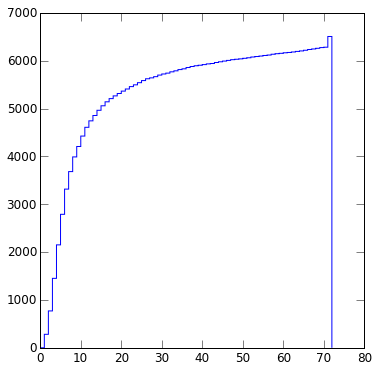

In [5]:
fig,ax = plt.subplots(figsize=(6,6))
ax.hist(s6y.nmonths, np.linspace(0,72,73), histtype='step', cumulative=1);

649


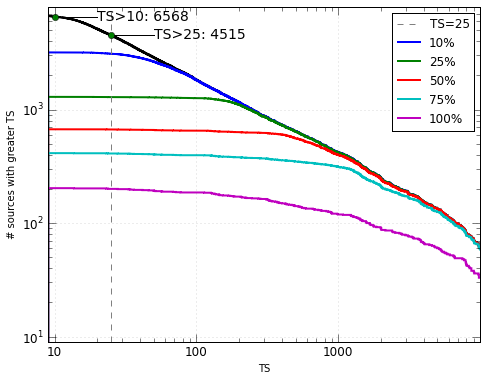

In [7]:
print sum(s6y.nmonths>36)
ta.sinfo.cumulative_ts(other_ts=[s6y.ts[s6y.nmonths>=n] for n in (7,18,36,54,72)], 
                    other_label=['10%','25%','50%', '75%', '100%'],
                    check_localized=False);

TS>100 : 1829
unid: 595


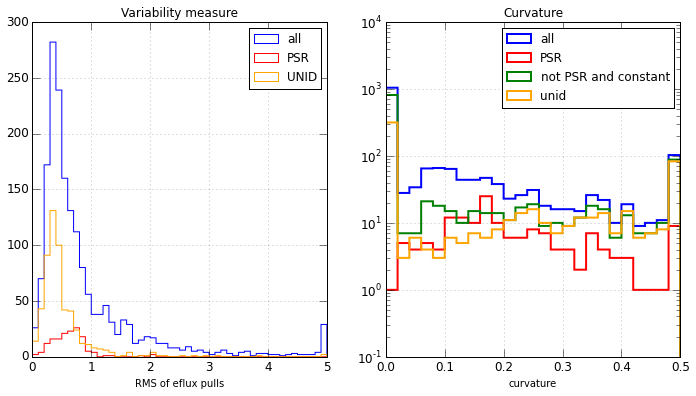

In [10]:
fig,axx = plt.subplots(1,2,figsize=(12,6))
tsmin=100
sel = si.df[si.df.ts>tsmin]
print 'TS>%d : %d' %(tsmin, len(sel))
psr = np.array([n.startswith('PSR') for n in sel.index], bool)
unid = np.array(sel.aprob<0.8, bool)
print 'unid: %d' %sum(unid)
pr = np.array(sel.pull_rms, float)
ax = axx[0]
bins=np.linspace(0,5,51)
ax.hist(pr.clip(0,5), bins, label='all', histtype='step');
ax.hist(pr[psr].clip(0,5), bins, color='red', label='PSR',  histtype='step');
ax.hist(pr[unid].clip(0,5), bins, label='UNID', color='orange', histtype='step')
ax.grid(True, alpha=0.5)
plt.setp(ax, xlabel='RMS of eflux pulls', title='Variability measure')
ax.legend();
ax=axx[1]
cv = np.array(sel.curvature, float)
xlim=(0,0.5)
bins = np.linspace(0,xlim[-1],26)
hkw= dict(histtype='step', log=True, lw=2)
ax.hist(cv.clip(*xlim), bins, label='all', **hkw)
ax.hist(cv[psr].clip(*xlim), bins, label='PSR', color='red', **hkw)
notpsr= np.logical_not(psr) & np.asarray(sel.pull_rms<1, bool)
ax.hist(cv[notpsr].clip(*xlim), bins, label='not PSR and constant', color='green', **hkw)
ax.hist(cv[unid].clip(*xlim), bins, label='unid', color='orange', **hkw)

ax.grid(True, alpha=0.5)
ax.legend()
plt.setp(ax, xlabel='curvature', title='Curvature')


In [11]:
si.df.ix[1] #[si.df.pull_rms>2]['ts eflux flux_ratio ngood pull_rms'.split()]

acat                                                           
adts_max                                                    NaN
adts_mean                                                   NaN
aprob                                                         0
curvature                                             0.4435484
eflux                                                  42.03045
flux_ratio                                                  NaN
mean                                                        NaN
monthly             a acat adeltats aprob     eflux   good l...
ngood                                                         0
nmonths                                                      16
pull_rms                                                    NaN
ts                                                     170.1956
Name: Cygnus Cocoon, dtype: object